In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [8]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv")

In [9]:
coffee_data

Unnamed: 0  Species                     Owner Country.of.Origin  \
0              0  Arabica                 metad plc          Ethiopia   
1              1  Arabica                 metad plc          Ethiopia   
2              2  Arabica  grounds for health admin         Guatemala   
3              3  Arabica       yidnekachew dabessa          Ethiopia   
4              4  Arabica                 metad plc          Ethiopia   
...          ...      ...                       ...               ...   
1334        1334  Robusta               luis robles           Ecuador   
1335        1335  Robusta               luis robles           Ecuador   
1336        1336  Robusta               james moore     United States   
1337        1337  Robusta             cafe politico             India   
1338        1338  Robusta             cafe politico           Vietnam   

                                     Farm.Name Lot.Number            Mill  \
0                                    metad plc        NaN       metad plc   
1                                    metad plc        NaN       metad plc   
2     san marcos barrancas "san cristobal cuch        NaN             NaN   
3        yidnekachew dabessa coffee plantation        NaN         wolensu   
4                                    metad plc        NaN       metad plc   
...                                        ...        ...             ...   
1334                                 robustasa   Lavado 1     our own lab   
1335                                 robustasa   Lavado 3  own laboratory   
1336                           fazenda cazengo        NaN    cafe cazengo   
1337                                       NaN        NaN             NaN   
1338                                       NaN        NaN             NaN   

             ICO.Number                                Company       Altitude  \
0             2014/2015      metad agricultural developmet plc      1950-2200   
1             2014/2015      metad agricultural developmet plc      1950-2200   
2                   NaN                                    NaN  1600 - 1800 m   
3                   NaN  yidnekachew debessa coffee plantation      1800-2200   
4             2014/2015      metad agricultural developmet plc      1950-2200   
...                 ...                                    ...            ...   
1334                NaN                              robustasa            NaN   
1335                NaN                              robustasa             40   
1336                NaN                global opportunity fund     795 meters   
1337  14-1118-2014-0087                          cafe politico            NaN   
1338                NaN                          cafe politico            NaN   

      ...       Color Category.Two.Defects           Expiration  \
0     ...       Green                    0      April 3rd, 2016   
1     ...       Green                    1      April 3rd, 2016   
2     ...         NaN                    0       May 31st, 2011   
3     ...       Green                    2     March 25th, 2016   
4     ...       Green                    2      April 3rd, 2016   
...   ...         ...                  ...                  ...   
1334  ...  Blue-Green                    1   January 18th, 2017   
1335  ...  Blue-Green                    0   January 18th, 2017   
1336  ...         NaN                    6  December 23rd, 2015   
1337  ...       Green                    1    August 25th, 2015   
1338  ...         NaN                    9    August 25th, 2015   

                      Certification.Body  \
0     METAD Agricultural Development plc   
1     METAD Agricultural Development plc   
2           Specialty Coffee Association   
3     METAD Agricultural Development plc   
4     METAD Agricultural Development plc   
...                                  ...   
1334        Specialty Coffee Association   
1335        Specialty Coffee Association   
1336        Specialty Coffee A

In [10]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

I remove the column "Unnamed: 0" because it is duplicated with the indexes of the df:

In [11]:
coffee_data = coffee_data.drop(columns = ["Unnamed: 0"])

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [1551]:
coffee_data.shape

(1339, 43)

In [1552]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1339 non-null   object 
 1   Owner                  1332 non-null   object 
 2   Country.of.Origin      1338 non-null   object 
 3   Farm.Name              980 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1021 non-null   object 
 6   ICO.Number             1180 non-null   object 
 7   Company                1130 non-null   object 
 8   Altitude               1113 non-null   object 
 9   Region                 1280 non-null   object 
 10  Producer               1107 non-null   object 
 11  Number.of.Bags         1339 non-null   int64  
 12  Bag.Weight             1339 non-null   object 
 13  In.Country.Partner     1339 non-null   object 
 14  Harvest.Year           1292 non-null   object 
 15  Grad

In [1553]:
coffee_data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [1554]:
# categorical features:
coffee_data.select_dtypes(include=["object"]).columns.tolist()

['Species',
 'Owner',
 'Country.of.Origin',
 'Farm.Name',
 'Lot.Number',
 'Mill',
 'ICO.Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Bag.Weight',
 'In.Country.Partner',
 'Harvest.Year',
 'Grading.Date',
 'Owner.1',
 'Variety',
 'Processing.Method',
 'Color',
 'Expiration',
 'Certification.Body',
 'Certification.Address',
 'Certification.Contact',
 'unit_of_measurement']

In [1555]:
# numerical features:
coffee_data.select_dtypes(include=["number"]).columns.tolist()

['Number.of.Bags',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean.Cup',
 'Sweetness',
 'Cupper.Points',
 'Total.Cup.Points',
 'Moisture',
 'Category.One.Defects',
 'Quakers',
 'Category.Two.Defects',
 'altitude_low_meters',
 'altitude_high_meters',
 'altitude_mean_meters']

In [1556]:
coffee_data.describe().T

count         mean          std  min      25%      50%  \
Number.of.Bags        1339.0   154.182972   129.987162  0.0    14.00   175.00   
Aroma                 1339.0     7.566706     0.377560  0.0     7.42     7.58   
Flavor                1339.0     7.520426     0.398442  0.0     7.33     7.58   
Aftertaste            1339.0     7.401083     0.404463  0.0     7.25     7.42   
Acidity               1339.0     7.535706     0.379827  0.0     7.33     7.58   
Body                  1339.0     7.517498     0.370064  0.0     7.33     7.50   
Balance               1339.0     7.518013     0.408943  0.0     7.33     7.50   
Uniformity            1339.0     9.834877     0.554591  0.0    10.00    10.00   
Clean.Cup             1339.0     9.835108     0.763946  0.0    10.00    10.00   
Sweetness             1339.0     9.856692     0.616102  0.0    10.00    10.00   
Cupper.Points         1339.0     7.503376     0.473464  0.0     7.25     7.50   
Total.Cup.Points      1339.0    82.089851     3.500575  0.0    81.08    82.50   
Moisture              1339.0     0.088379     0.048287  0.0     0.09     0.11   
Category.One.Defects  1339.0     0.479462     2.549683  0.0     0.00     0.00   
Quakers               1338.0     0.173393     0.832121  0.0     0.00     0.00   
Category.Two.Defects  1339.0     3.556385     5.312541  0.0     0.00     2.00   
altitude_low_meters   1109.0  1750.713315  8669.440545  1.0  1100.00  1310.64   
altitude_high_meters  1109.0  1799.347775  8668.805771  1.0  1100.00  1350.00   
altitude_mean_meters  1109.0  1775.030545  8668.626080  1.0  1100.00  1310.64   

                          75%        max  
Number.of.Bags         275.00    1062.00  
Aroma                    7.75       8.75  
Flavor                   7.75       8.83  
Aftertaste               7.58       8.67  
Acidity                  7.75       8.75  
Body                     7.67       8.58  
Balance                  7.75       8.75  
Uniformity              10.00      10.00  
Clean.Cup               10.00      10.00  
Sweetness               10.00      10.00  
Cupper.Points            7.75      10.00  
Total.Cup.Points        83.67      90.58  
Moisture                 0.12       0.28  
Category.One.Defects     0.00      63.00  
Quakers                  0.00      11.00  
Category.Two.Defects     4.00      55.00  
altitude_low_meters   1600.00  190164.00  
altitude_high_meters  1650.00  190164.00  
altitude_mean_meters  1600.00  190164.00

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [12]:
coffee_data.columns = coffee_data.columns.str.replace(".", "_")

In [13]:
coffee_data.columns = coffee_data.columns.str.lower()

In [14]:
coffee_data.columns.unique

<bound method Index.unique of Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')>

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [1560]:
coffee_data.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

Feature 'bag_weight' has different units of measurement and it is type object. It must be numerical \
First I converted lbs to kg and remove all units of measurement. Then I converted column type from object to int. Finally I renamed column name to 'bag_weight_kg' to be more descriptive.

In [16]:
def convert_to_kg(bag_weight):
    if "kg,lbs" in bag_weight:
        return int(bag_weight.replace("kg,lbs", ""))
    elif "kg" in bag_weight:
        return int(bag_weight.replace("kg", ""))
    elif "lbs" in bag_weight:
        return int(bag_weight.replace("lbs", "")) * 0.453592
    else:
        return int(bag_weight)

In [17]:
coffee_data.bag_weight = coffee_data.bag_weight.apply(convert_to_kg)

In [18]:
coffee_data.bag_weight = coffee_data.bag_weight.astype(int) # convert column type to float

In [19]:
coffee_data = coffee_data.rename(columns = {"bag_weight": "bag_weight_kg"}) # rename column name

In [20]:
coffee_data.bag_weight_kg.unique()

array([   60,     1,    30,    69,     2,     6,    50,     0,    45,
          15,    70, 19200,    46,    40,    20,    34,   660, 18975,
       12000,    35,    66,    80,    59,     5,    25, 18000,    68,
        9000,    18,    10,    29,  1218, 13800,  1500,    24,    36,
           8,     3,   350,    67,     4,   100,    58])

In [1567]:
coffee_data.bag_weight_kg.dtype

dtype('int32')

In [21]:
len(coffee_data[coffee_data.bag_weight_kg > 2500]) 

12

There are values significantly different from the rest of other bag_weight_kg values. Only 14 values are below 2500kg. I assume that there are outliers.

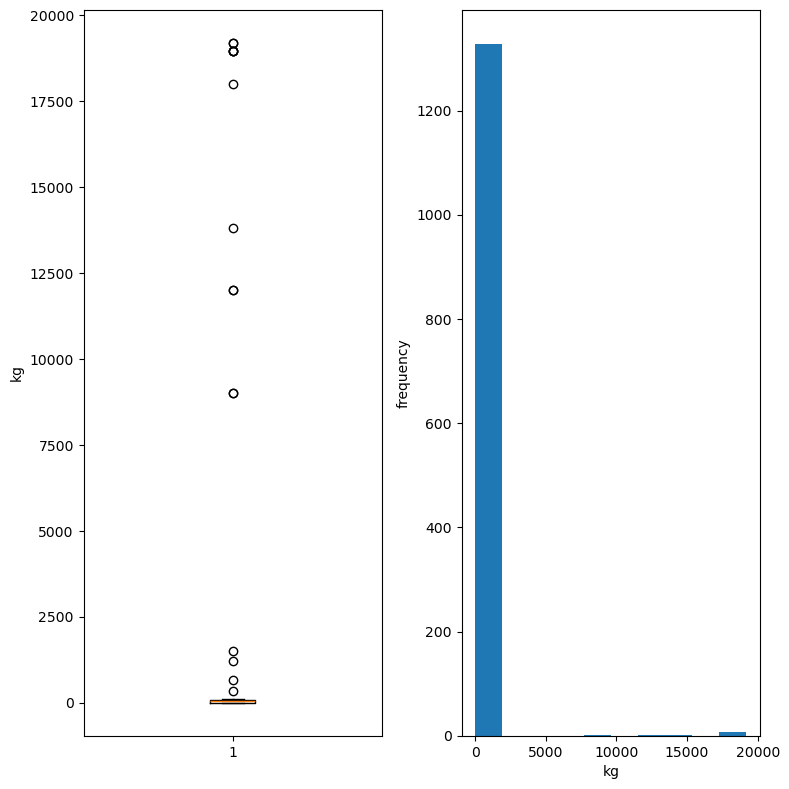

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.boxplot(coffee_data.bag_weight_kg)
ax1.set_ylabel("kg")
ax2.hist(coffee_data.bag_weight_kg)
ax2.set_xlabel("kg")
ax2.set_ylabel("frequency")
fig.tight_layout()
plt.show()

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [1570]:
coffee_data.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

To clean harvest_year I removed everything in string except the years and month names and put a hyphen where there are range of years. I know, that  I'm losing a lot of information with this approach..

In [23]:
def clean_harvest_years(harvest_year):
    if pd.isna(harvest_year):
        return np.nan

    coffee_data.loc[coffee_data.harvest_year == "4T/10", "harvest_year"] = "2010"
    coffee_data.loc[coffee_data.harvest_year == "08/09 crop", "harvest_year"] = "2008-2009"
    coffee_data.loc[coffee_data.harvest_year == "TEST", "harvest_year"] = np.nan
    coffee_data.loc[coffee_data.harvest_year == "mmm", "harvest_year"] = np.nan

    pattern_year = re.compile(r"(2\d{3})(?:\s*[-\/]\s*(2\d{2,3}))?")
    pattern_month = re.compile(r"([A-Z]{1}[a-z]{2}+)", re.IGNORECASE)
    
    match_full_year = pattern_year.search(harvest_year)
    match_month = pattern_month.search(harvest_year)
    
    if match_full_year:
        return match_full_year.group(0).replace(" ", "").replace("/", "-")
    else:
        return match_month.group(0).replace(" ", "").replace("/", "-")[0:3]

In [24]:
coffee_data.harvest_year = coffee_data.harvest_year.apply(clean_harvest_years)

In [25]:
coffee_data.harvest_year.unique()

array(['2014', nan, '2013', '2012', '2010', '2009', 'May', '2009-2010',
       '2015', '2011', '2016', '2015-2016', '2017', '2010-2011',
       '2013-2014', '2017-2018', '2014-2015', '2011-2012', '2016-2017',
       'Jan', 'Aug', 'Abr', '2018', '2008-2009'], dtype=object)

In [26]:
coffee_data.grading_date

0           April 4th, 2015
1           April 4th, 2015
2            May 31st, 2010
3          March 26th, 2015
4           April 4th, 2015
               ...         
1334     January 19th, 2016
1335     January 19th, 2016
1336    December 23rd, 2014
1337      August 25th, 2014
1338      August 25th, 2014
Name: grading_date, Length: 1339, dtype: object

In [1576]:
coffee_data.expiration

0           April 3rd, 2016
1           April 3rd, 2016
2            May 31st, 2011
3          March 25th, 2016
4           April 3rd, 2016
               ...         
1334     January 18th, 2017
1335     January 18th, 2017
1336    December 23rd, 2015
1337      August 25th, 2015
1338      August 25th, 2015
Name: expiration, Length: 1339, dtype: object

To fix grading dates and expiration dates i remove suffixes (st, nd, rd, th). Then convert them from object type to datetime type:

In [27]:
def remove_suffix(grading_date):
    suffs = ["st,", "nd,", "rd,", "th,"]
    for s in suffs:
        grading_date = grading_date.replace(s, "")
    return grading_date

In [28]:
coffee_data.grading_date = coffee_data.grading_date.apply(remove_suffix)
coffee_data.expiration = coffee_data.expiration.apply(remove_suffix)

In [29]:
coffee_data.grading_date = pd.to_datetime(coffee_data.grading_date, format = "mixed") 

In [30]:
coffee_data.expiration = pd.to_datetime(coffee_data.expiration, format = "mixed") 

In [31]:
coffee_data.grading_date

0      2015-04-04
1      2015-04-04
2      2010-05-31
3      2015-03-26
4      2015-04-04
          ...    
1334   2016-01-19
1335   2016-01-19
1336   2014-12-23
1337   2014-08-25
1338   2014-08-25
Name: grading_date, Length: 1339, dtype: datetime64[ns]

In [1583]:
coffee_data.expiration

0      2016-04-03
1      2016-04-03
2      2011-05-31
3      2016-03-25
4      2016-04-03
          ...    
1334   2017-01-18
1335   2017-01-18
1336   2015-12-23
1337   2015-08-25
1338   2015-08-25
Name: expiration, Length: 1339, dtype: datetime64[ns]

In [35]:
coffee_data.dtypes

species                          object
owner                            object
country_of_origin                object
farm_name                        object
lot_number                       object
mill                             object
ico_number                       object
company                          object
altitude                         object
region                           object
producer                         object
number_of_bags                    int64
bag_weight_kg                     int32
in_country_partner               object
harvest_year                     object
grading_date             datetime64[ns]
owner_1                          object
variety                          object
processing_method                object
aroma                           float64
flavor                          float64
aftertaste                      float64
acidity                         float64
body                            float64
balance                         float64


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [1586]:
coffee_data.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [36]:
coffee_data.country_of_origin.value_counts(dropna = False)

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

Only one country in coffee_data is unknown. I dont want to drop it, so i decide to predict the county. First I found entry with missing country and checked ico_number. Then I checked the owner of that coffee: what other coffees he owns and what are their countries. 

In [37]:
coffee_data[coffee_data.country_of_origin.isna()]

species               owner country_of_origin farm_name lot_number mill  \
1197  Arabica  racafe & cia s.c.a               NaN       NaN        NaN  NaN   

     ico_number company altitude region  ... color  category_two_defects  \
1197  3-37-1980     NaN      NaN    NaN  ...   NaN                     3   

      expiration certification_body                     certification_address  \
1197  2012-02-29           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   

                         certification_contact unit_of_measurement  \
1197  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   

     altitude_low_meters altitude_high_meters  altitude_mean_meters  
1197                 NaN                  NaN                   NaN  

[1 rows x 43 columns]

In [38]:
coffee_data[coffee_data.ico_number == "3-37-1980"]

species               owner country_of_origin farm_name lot_number mill  \
1059  Arabica  racafe & cia s.c.a          Colombia       NaN        NaN  NaN   
1197  Arabica  racafe & cia s.c.a               NaN       NaN        NaN  NaN   

     ico_number company altitude region  ... color  category_two_defects  \
1059  3-37-1980     NaN      NaN    NaN  ...   NaN                     2   
1197  3-37-1980     NaN      NaN    NaN  ...   NaN                     3   

      expiration certification_body                     certification_address  \
1059  2012-03-14           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   
1197  2012-02-29           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   

                         certification_contact unit_of_measurement  \
1059  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
1197  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   

     altitude_low_meters altitude_high_meters  altitude_mean_meters  
1059                 NaN                  NaN                   NaN  
1197                 NaN                  NaN                   NaN  

[2 rows x 43 columns]

In [1589]:
coffee_data[coffee_data.owner == "racafe & cia s.c.a"].head(5)

species               owner country_of_origin farm_name lot_number  \
97   Arabica  racafe & cia s.c.a          Colombia       NaN  3-37-1829   
106  Arabica  racafe & cia s.c.a          Colombia       NaN  3-37-0277   
107  Arabica  racafe & cia s.c.a          Colombia       NaN        NaN   
110  Arabica  racafe & cia s.c.a          Colombia       NaN        NaN   
145  Arabica  racafe & cia s.c.a          Colombia       NaN  3-37-1724   

            mill ico_number             company             altitude  \
97        bachue  3-37-1829  racafe & cia s.c.a                  NaN   
106       bachue  3-37-0277  racafe & cia s.c.a                  NaN   
107          NaN  3-37-4824  racafe & cia s.c.a  de 1600 a 1950 msnm   
110          NaN  3-37-0416  racafe & cia s.c.a  de 1600 a 1950 msnm   
145  bucaramanga  3-37-1724  racafe & cia s.c.a                 1500   

        region  ...       color  category_two_defects  expiration  \
97       huila  ...       Green                     3  2018-02-15   
106      huila  ...         NaN                     2  2017-11-25   
107      huila  ...       Green                     1  2016-10-25   
110      huila  ...       Green                     3  2013-12-11   
145  santander  ...  Blue-Green                     4  2018-01-10   

    certification_body                     certification_address  \
97            Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   
106           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   
107           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   
110           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   
145           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   

                        certification_contact unit_of_measurement  \
97   70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
106  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
107  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
110  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
145  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   

    altitude_low_meters altitude_high_meters  altitude_mean_meters  
97                  NaN                  NaN                   NaN  
106                 NaN                  NaN                   NaN  
107              1600.0               1950.0                1775.0  
110              1600.0               1950.0                1775.0  
145              1500.0               1500.0                1500.0  

[5 rows x 43 columns]

In [39]:
len(coffee_data[coffee_data.owner == "racafe & cia s.c.a"])

60

After gathering this information I assumed that the country was probably Colombia.

In [40]:
len(coffee_data[(coffee_data.owner == "racafe & cia s.c.a") & (coffee_data.country_of_origin == "Colombia")])

59

In [41]:
coffee_data.loc[coffee_data.country_of_origin.isna(), "country_of_origin"] = "Colombia" 

In [42]:
coffee_data[coffee_data.index == 1197]

species               owner country_of_origin farm_name lot_number mill  \
1197  Arabica  racafe & cia s.c.a          Colombia       NaN        NaN  NaN   

     ico_number company altitude region  ... color  category_two_defects  \
1197  3-37-1980     NaN      NaN    NaN  ...   NaN                     3   

      expiration certification_body                     certification_address  \
1197  2012-02-29           Almacafé  e493c36c2d076bf273064f7ac23ad562af257a25   

                         certification_contact unit_of_measurement  \
1197  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   

     altitude_low_meters altitude_high_meters  altitude_mean_meters  
1197                 NaN                  NaN                   NaN  

[1 rows x 43 columns]

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [1446]:
coffee_data.owner

0                      metad plc
1                      metad plc
2       grounds for health admin
3            yidnekachew dabessa
4                      metad plc
                  ...           
1334                 luis robles
1335                 luis robles
1336                 james moore
1337               cafe politico
1338               cafe politico
Name: owner, Length: 1339, dtype: object

In [1594]:
len(coffee_data.owner.unique())

316

In [43]:
len(coffee_data[coffee_data.owner.isna()])

7

In [1596]:
coffee_data.owner_1

0                      metad plc
1                      metad plc
2       Grounds for Health Admin
3            Yidnekachew Dabessa
4                      metad plc
                  ...           
1334                 Luis Robles
1335                 Luis Robles
1336                 James Moore
1337               Cafe Politico
1338               Cafe Politico
Name: owner_1, Length: 1339, dtype: object

In [1597]:
len(coffee_data.owner_1.unique())

320

In [1598]:
len(coffee_data[coffee_data.owner_1.isna()])

7

Replace NaN values in owner_1 column with the most frequent owner:

In [1794]:
coffee_data.owner_1.value_counts()

owner_1
Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
ALVARO QUIROS PEREZ                   1
OLIVIA HERNANDEZ VIRVES               1
FINCA LAS NIEVES                      1
Pedro Santos e Silva                  1
James Moore                           1
Name: count, Length: 319, dtype: int64

In [44]:
coffee_data["owner_1"].fillna("Juan Luis Alvarado Romero", inplace = True)

Delete column owner because it is duplicated with owner_1:

In [45]:
coffee_data = coffee_data.drop(columns=["owner"])

In [46]:
coffee_data = coffee_data.rename(columns= {"owner_1": "owner"})

To check the similarity between 2 sets i used intersection method. It returns new set that contains only items that exist in both sets. \
First I made producer and owner names lowercase and remove empty spaces at the beginning and at the end of the strings. Then I made sets of unique values. 

In [47]:
coffee_data.producer

0                                   METAD PLC
1                                   METAD PLC
2                                         NaN
3       Yidnekachew Dabessa Coffee Plantation
4                                   METAD PLC
                        ...                  
1334            Café Robusta del Ecuador S.A.
1335            Café Robusta del Ecuador S.A.
1336                             Cafe Cazengo
1337                                      NaN
1338                                      NaN
Name: producer, Length: 1339, dtype: object

In [48]:
coffee_data.owner = coffee_data.owner.str.lower().str.strip()
coffee_data.producer = coffee_data.producer.str.lower().str.strip()

In [49]:
owner_producer = coffee_data[["owner", "producer"]]

In [50]:
owner_producer.head(5)

owner                               producer
0                 metad plc                              metad plc
1                 metad plc                              metad plc
2  grounds for health admin                                    NaN
3       yidnekachew dabessa  yidnekachew dabessa coffee plantation
4                 metad plc                              metad plc

In [51]:
unique_owners_set = set(coffee_data.owner.unique())
unique_producers_set = set(coffee_data.producer.unique())

# new set with unique values that exists in both - unique_owners_set and unique_producers_set:
common_elements_set = unique_owners_set.intersection(unique_producers_set)

print(common_elements_set)
print(f"\nThere are {len(common_elements_set)} common elements between producer and owner.")

{'manuel herrera juarez', 'kabum trading company', 'jungle estate', 'jorge francisco martinez hachity', 'andres martinez leon', 'u soe', 'amkeni gourmet coffee group', 'salvador caro carrion', 'juan avenamar rodriguez funez', 'nishant gurjer', 'eduardo luis augusto velazquez solis', 'santiago solis ayerdi', 'enrique mitre lopez', 'semiramis casas velazquez', 'rolando lacayo', 'tutunze kahawa ltd', 'pablo enrique martinez gama', 'juan garcia hernandez', 'gladness obed pallangyo', 'nyapea coffee farmers association', 'kyagalanyi coffee ltd', 'asociación aldea global jinotega', 'roberto licona franco', 'eugene holman pew', 'adriana torres rico quevedo', 'min hlaing', 'u htun htun', 'eric jesus cordoba arroyo', 'pablo cervantes morelos', 'colbran coffeelands, ltd.', 'kao ming lee', 'gloria antonieta escobar urrutia', 'taylor winch (t) ltd', 'exportadora de cafe condor s.a', 'balbino ramirez flores', 'fernando mendoza aparicio', 'olivia hernandez virves', 'acacia hills ltd', 'delfina leon s

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [52]:
coffee_data.color.value_counts(dropna = False)

color
Green           870
NaN             270
Bluish-Green    114
Blue-Green       85
Name: count, dtype: int64

In [53]:
coffee_data.color.fillna(np.nan)

0            Green
1            Green
2              NaN
3            Green
4            Green
           ...    
1334    Blue-Green
1335    Blue-Green
1336           NaN
1337         Green
1338           NaN
Name: color, Length: 1339, dtype: object

First I group by 'country_of_origin' and 'color' and count of coffees. Then I make pivot table where countries are in rows. 

In [54]:
count_colors_country_df = coffee_data.groupby(["country_of_origin", "color"]).size().reset_index(name = "coffee_count")

In [55]:
count_colors_country_df.head(5)

country_of_origin         color  coffee_count
0            Brazil    Blue-Green            14
1            Brazil  Bluish-Green            12
2            Brazil         Green            92
3           Burundi         Green             1
4             China         Green            16

In [56]:
pivot_count_colors_country = count_colors_country_df.pivot(
    index = "country_of_origin", 
    columns = "color", 
    values = "coffee_count", 
).reset_index()

In [57]:
pivot_count_colors_country

color             country_of_origin  Blue-Green  Bluish-Green  Green
0                            Brazil        14.0          12.0   92.0
1                           Burundi         NaN           NaN    1.0
2                             China         NaN           NaN   16.0
3                          Colombia         8.0           8.0  118.0
4                        Costa Rica        10.0           9.0   28.0
5                     Cote d?Ivoire         NaN           1.0    NaN
6                           Ecuador         2.0           1.0    NaN
7                       El Salvador         2.0           2.0    9.0
8                          Ethiopia         NaN           2.0   15.0
9                         Guatemala         2.0           7.0  159.0
10                            Haiti         1.0           1.0    2.0
11                         Honduras         3.0           2.0   47.0
12                            India         1.0           2.0   10.0
13                        Indonesia         4.0           3.0    6.0
14                            Japan         NaN           NaN    1.0
15                            Kenya         3.0           6.0   14.0
16                             Laos         1.0           1.0    1.0
17                           Malawi         1.0           4.0    6.0
18                        Mauritius         NaN           NaN    1.0
19                           Mexico         7.0           7.0  156.0
20                          Myanmar         NaN           NaN    7.0
21                        Nicaragua         NaN           2.0   19.0
22                           Panama         NaN           1.0    2.0
23                 Papua New Guinea         NaN           1.0    NaN
24                             Peru         NaN           2.0    6.0
25                      Philippines         1.0           1.0    2.0
26                           Rwanda         NaN           1.0    NaN
27                           Taiwan        14.0           5.0   50.0
28     Tanzania, United Republic Of         NaN           7.0   32.0
29                         Thailand         3.0           7.0   10.0
30                           Uganda         2.0           1.0   32.0
31                    United States         NaN           NaN    1.0
32           United States (Hawaii)         6.0          16.0   21.0
33      United States (Puerto Rico)         NaN           1.0    3.0
34                          Vietnam         NaN           1.0    3.0

For continents: I make dictionary with countries and continents. Then i make new column 'continent' in coffee_data and map each country with its corresponding continent. Then group by 'continent' and 'color' and count of coffee. Finally i make pivot table.

In [58]:
country_continent = {
    'Ethiopia': 'Africa',
    'Guatemala': 'North America',
    'Brazil': 'South America',
    'United States': 'North America',
    'United States (Hawaii)': 'North America',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Costa Rica': 'North America',
    'Mexico': 'North America',
    'Uganda': 'Africa',
    'Honduras': 'North America',
    'Taiwan': 'Asia',
    'Nicaragua': 'North America',
    'Tanzania, United Republic Of': 'Africa',
    'Kenya': 'Africa',
    'Thailand': 'Asia',
    'Colombia': 'South America',
    'Panama': 'North America',
    'Papua New Guinea': 'Australia',
    'El Salvador': 'North America',
    'Japan': 'Asia',
    'Ecuador': 'South America',
    'United States (Puerto Rico)': 'North America',
    'Haiti': 'North America',
    'Burundi': 'Africa',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Rwanda': 'Africa',
    'Malawi': 'Africa',
    'Laos': 'Asia',
    'Zambia': 'Africa',
    'Myanmar': 'Asia',
    'Mauritius': 'Africa',
    'Cote d?Ivoire': 'Africa',
    'India': 'Asia'
}

In [59]:
coffee_data["continent"] = coffee_data["country_of_origin"].map(country_continent)

In [60]:
count_colors_continent = coffee_data.groupby(["continent", "color"]).size()

In [61]:
count_colors_continent_df = count_colors_continent.reset_index(name = "count_coffee")

In [62]:
count_colors_continent_df

continent         color  count_coffee
0          Africa    Blue-Green             6
1          Africa  Bluish-Green            22
2          Africa         Green           101
3            Asia    Blue-Green            24
4            Asia  Bluish-Green            20
5            Asia         Green           106
6       Australia  Bluish-Green             1
7   North America    Blue-Green            31
8   North America  Bluish-Green            48
9   North America         Green           447
10  South America    Blue-Green            24
11  South America  Bluish-Green            21
12  South America         Green           210

In [63]:
pivot_count_colors_continent_df = coffee_data.groupby(["continent", "color"]).size().reset_index(name = "count_coffee")

In [64]:
pivot_count_colors_continent_df = count_colors_continent_df.pivot(
    index = "continent", 
    columns = "color", 
    values = "count_coffee",
).reset_index() 

In [65]:
pivot_count_colors_continent_df

color      continent  Blue-Green  Bluish-Green  Green
0             Africa         6.0          22.0  101.0
1               Asia        24.0          20.0  106.0
2          Australia         NaN           1.0    NaN
3      North America        31.0          48.0  447.0
4      South America        24.0          21.0  210.0

### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

aroma: mean = 7.567, std = 0.378, max-min range = 8.75
flavor: mean = 7.520, std = 0.398, max-min range = 8.83
aftertaste: mean = 7.401, std = 0.404, max-min range = 8.67
acidity: mean = 7.536, std = 0.380, max-min range = 8.75
body: mean = 7.517, std = 0.370, max-min range = 8.58
balance: mean = 7.518, std = 0.409, max-min range = 8.75
uniformity: mean = 9.835, std = 0.555, max-min range = 10.0
clean_cup: mean = 9.835, std = 0.764, max-min range = 10.0
sweetness: mean = 9.857, std = 0.616, max-min range = 10.0
cupper_points: mean = 7.503, std = 0.473, max-min range = 10.0
total_cup_points: mean = 82.090, std = 3.501, max-min range = 90.58
moisture: mean = 0.088, std = 0.048, max-min range = 0.28


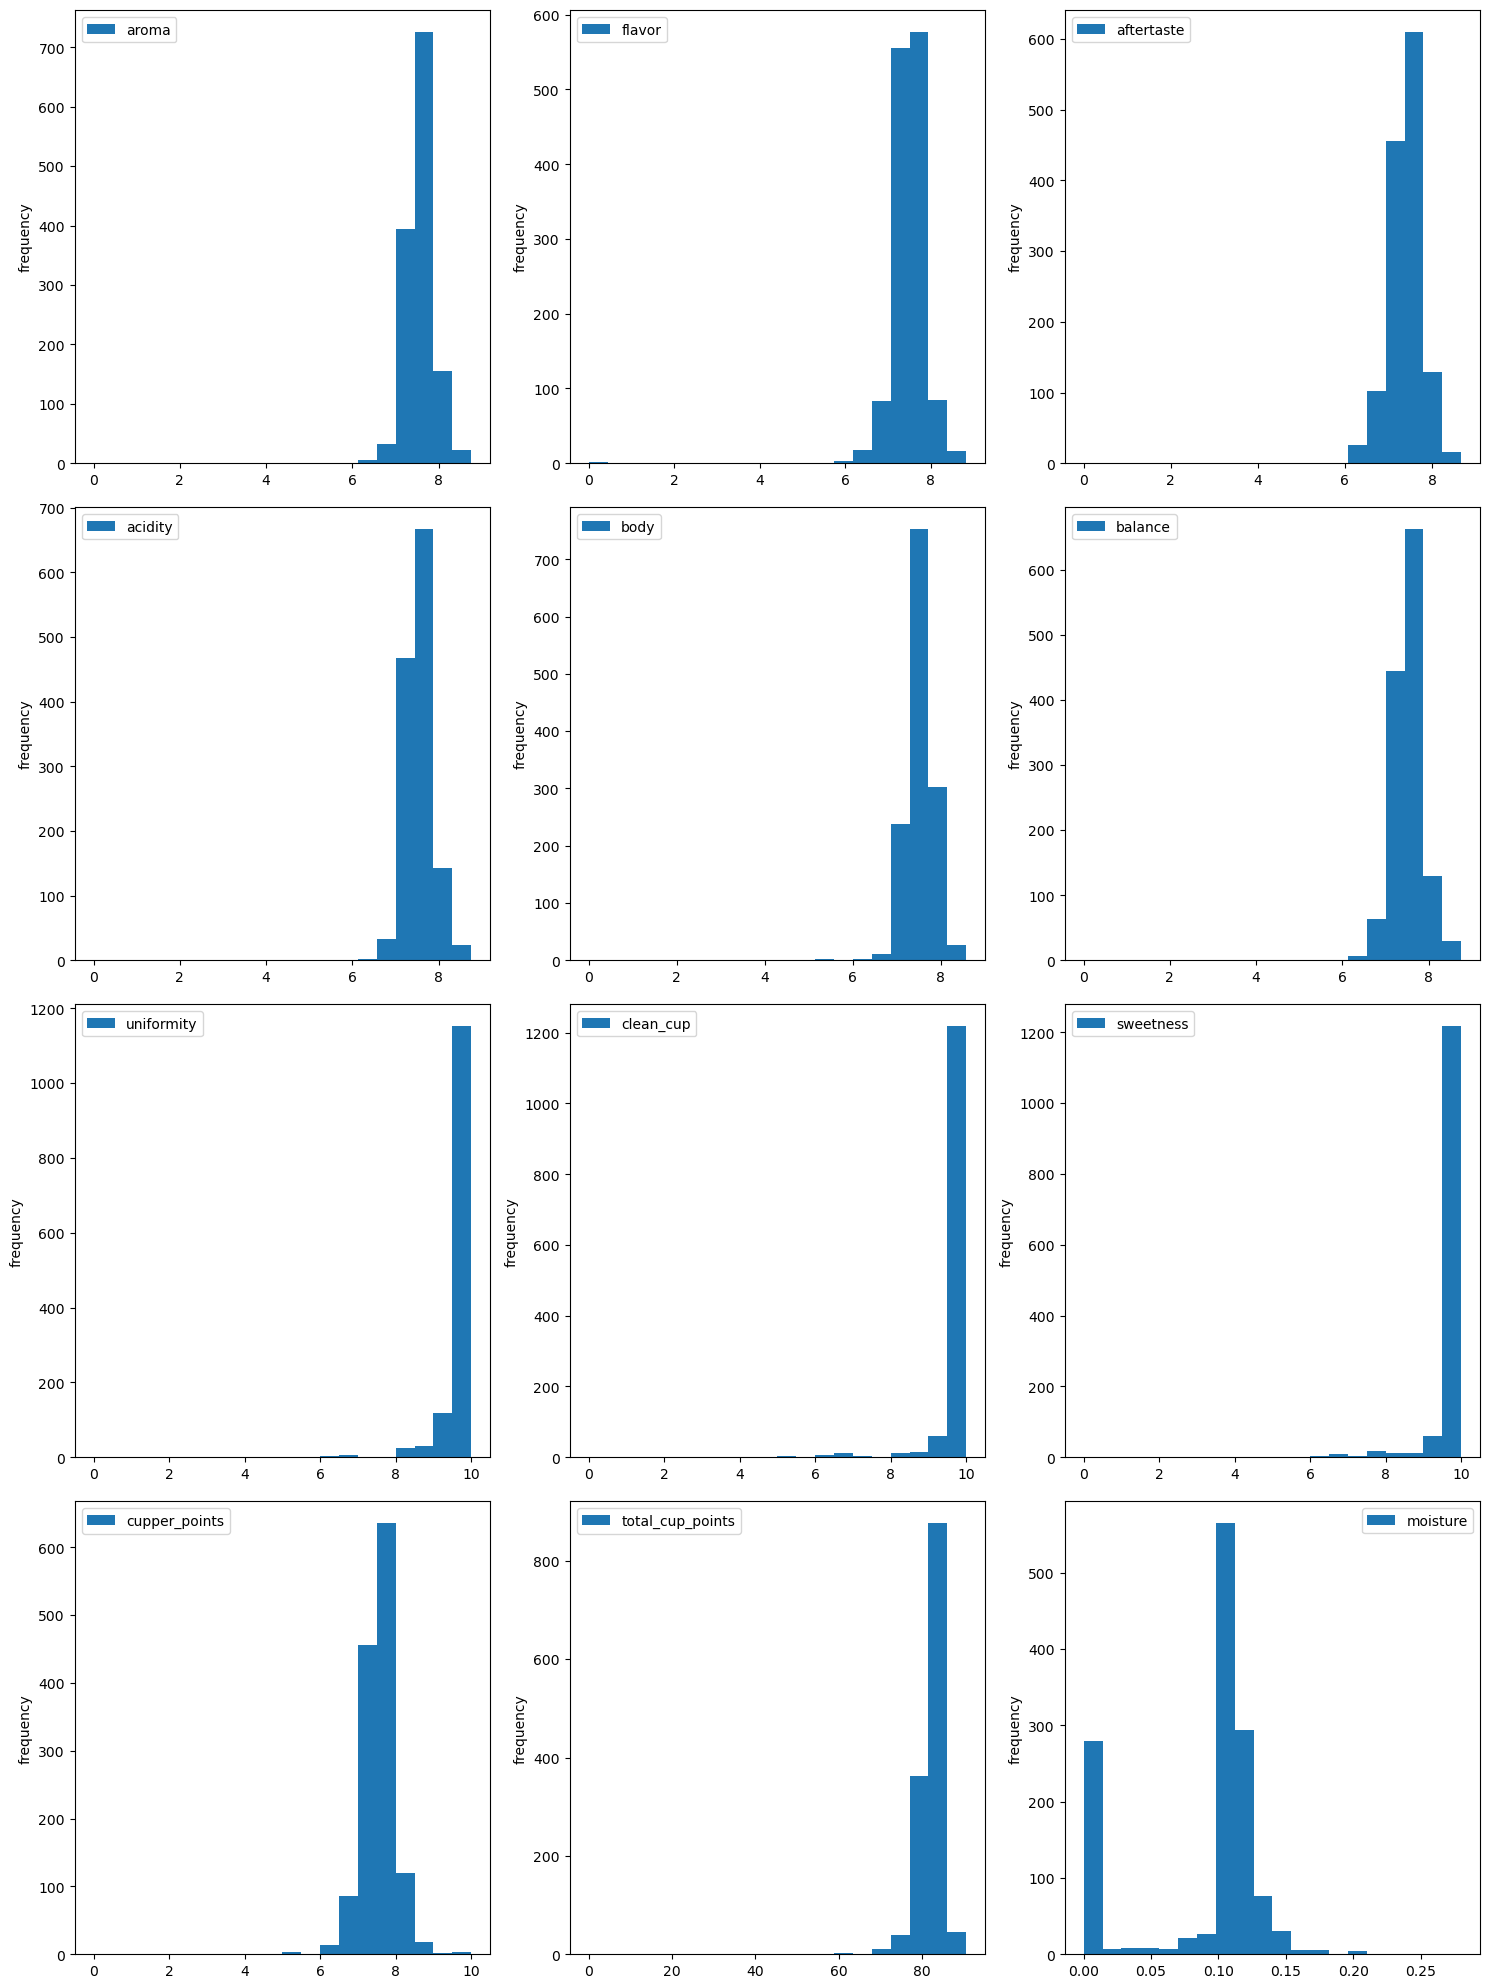

In [66]:
coffee_ratings = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity",
                  "clean_cup", "sweetness", "cupper_points", "total_cup_points", "moisture"]

fig, axs = plt.subplots(4, 3, figsize = (15, 20))
axs = axs.flatten()

for el in coffee_ratings:
    print(f"{coffee_data[el].name}: mean = {coffee_data[el].mean():.3f}, std = {coffee_data[el].std():.3f}, "
        f"max-min range = {coffee_data[el].max() - coffee_data[el].min()}")

    idx = coffee_ratings.index(el)
    axs[idx].hist(coffee_data[el], bins = 20, label = el)
    axs[idx].set_ylabel("frequency")
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [1822]:
coffee_data[coffee_ratings].describe().T

count       mean       std  min    25%    50%    75%    max
aroma             1339.0   7.566706  0.377560  0.0   7.42   7.58   7.75   8.75
flavor            1339.0   7.520426  0.398442  0.0   7.33   7.58   7.75   8.83
aftertaste        1339.0   7.401083  0.404463  0.0   7.25   7.42   7.58   8.67
acidity           1339.0   7.535706  0.379827  0.0   7.33   7.58   7.75   8.75
body              1339.0   7.517498  0.370064  0.0   7.33   7.50   7.67   8.58
balance           1339.0   7.518013  0.408943  0.0   7.33   7.50   7.75   8.75
uniformity        1339.0   9.834877  0.554591  0.0  10.00  10.00  10.00  10.00
clean_cup         1339.0   9.835108  0.763946  0.0  10.00  10.00  10.00  10.00
sweetness         1339.0   9.856692  0.616102  0.0  10.00  10.00  10.00  10.00
cupper_points     1339.0   7.503376  0.473464  0.0   7.25   7.50   7.75  10.00
total_cup_points  1339.0  82.089851  3.500575  0.0  81.08  82.50  83.67  90.58
moisture          1339.0   0.088379  0.048287  0.0   0.09   0.11   0.12   0.28

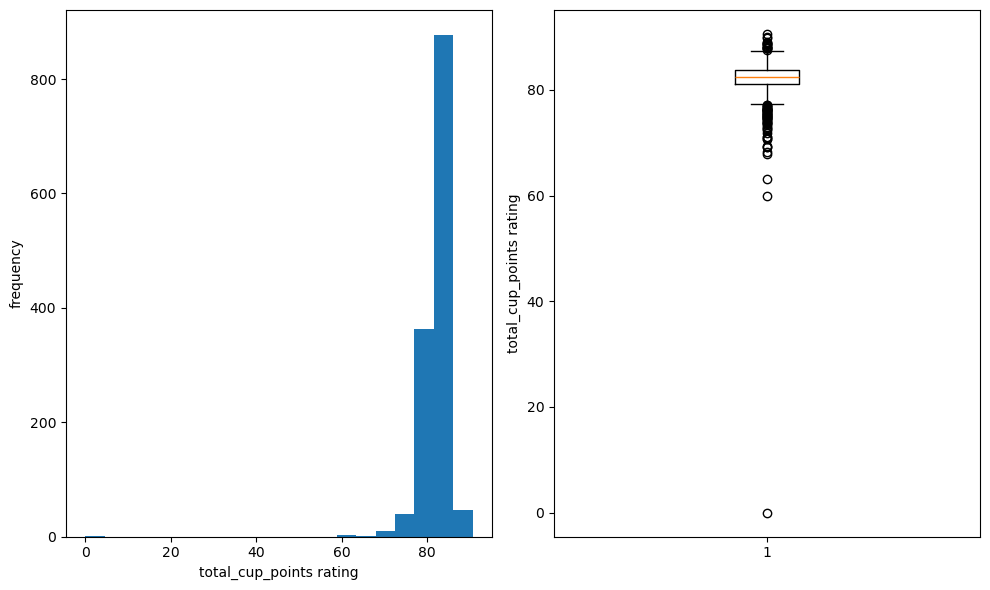

In [67]:
# 'total_cup_points' is cumulative score based on all coffee_ratings - sum of all other ratings values:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
axs[0].hist(coffee_data.total_cup_points, bins = 20, label = el)
axs[0].set_xlabel("total_cup_points rating")
axs[0].set_ylabel("frequency")

axs[1].boxplot(coffee_data.total_cup_points)
axs[1].set_ylabel("total_cup_points rating")

plt.tight_layout()
plt.show()

boxplot and histogram of 'total_cup_points' column show that there is an outlier:

In [68]:
coffee_data[coffee_data.total_cup_points < 50]

species country_of_origin     farm_name lot_number                mill  \
1310  Arabica          Honduras  los hicaques        103  cigrah s.a de c.v.   

      ico_number            company altitude     region         producer  ...  \
1310  13-111-053  cigrah s.a de c.v     1400  comayagua  reinerio zepeda  ...   

      category_two_defects  expiration            certification_body  \
1310                     2  2018-04-28  Instituto Hondureño del Café   

                         certification_address  \
1310  b4660a57e9f8cc613ae5b8f02bfce8634c763ab4   

                         certification_contact unit_of_measurement  \
1310  7f521ca403540f81ec99daec7da19c2788393880                   m   

     altitude_low_meters altitude_high_meters  altitude_mean_meters  \
1310              1400.0               1400.0                1400.0   

          continent  
1310  North America  

[1 rows x 43 columns]

This entry doesn't provide any information about ratings so I fill in the '0' values ​​with the averages for the current column:

In [69]:
row = coffee_data[coffee_data.index == 1310]

In [70]:
row[["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness", "cupper_points", "moisture"]]

aroma  flavor  aftertaste  acidity  body  balance  uniformity  \
1310    0.0     0.0         0.0      0.0   0.0      0.0         0.0   

      clean_cup  sweetness  cupper_points  moisture  
1310        0.0        0.0            0.0      0.12

In [71]:
coffee_data.loc[coffee_data.index == 1310, "aroma"] = coffee_data.aroma.mean()
coffee_data.loc[coffee_data.index == 1310, "flavor"] = coffee_data.flavor.mean()
coffee_data.loc[coffee_data.index == 1310, "aftertaste"] = coffee_data.aftertaste.mean()
coffee_data.loc[coffee_data.index == 1310, "acidity"] = coffee_data.acidity.mean()
coffee_data.loc[coffee_data.index == 1310, "body"] = coffee_data.body.mean()
coffee_data.loc[coffee_data.index == 1310, "balance"] = coffee_data.balance.mean()
coffee_data.loc[coffee_data.index == 1310, "uniformity"] = coffee_data.uniformity.mean()
coffee_data.loc[coffee_data.index == 1310, "clean_cup"] = coffee_data.clean_cup.mean()
coffee_data.loc[coffee_data.index == 1310, "sweetness"] = coffee_data.sweetness.mean()
coffee_data.loc[coffee_data.index == 1310, "cupper_points"] = coffee_data.cupper_points.mean()
coffee_data.loc[coffee_data.index == 1310, "total_cup_points"] = coffee_data.total_cup_points.mean()

In [1727]:
row = coffee_data[coffee_data.index == 1310]

In [72]:
row[["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness", "cupper_points", "moisture", "total_cup_points"]]

aroma  flavor  aftertaste  acidity  body  balance  uniformity  \
1310    0.0     0.0         0.0      0.0   0.0      0.0         0.0   

      clean_cup  sweetness  cupper_points  moisture  total_cup_points  
1310        0.0        0.0            0.0      0.12               0.0

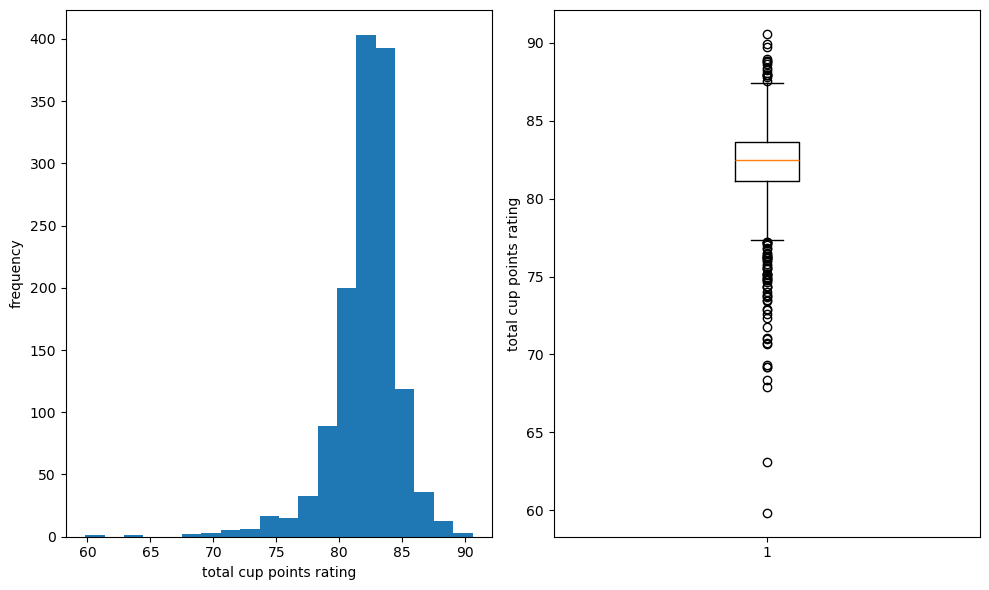

In [73]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
axs[0].hist(coffee_data.total_cup_points, bins = 20, label = el)
axs[0].set_xlabel("total cup points rating")
axs[0].set_ylabel("frequency")

axs[1].boxplot(coffee_data.total_cup_points)
axs[1].set_ylabel("total cup points rating")

plt.tight_layout()
plt.show()

                  aroma    flavor  aftertaste   acidity      body   balance  \
aroma          1.000000  0.740314    0.694292  0.606602  0.529874  0.598973   
flavor         0.740314  1.000000    0.859529  0.745873  0.630419  0.719607   
aftertaste     0.694292  0.859529    1.000000  0.716019  0.633841  0.745644   
acidity        0.606602  0.745873    0.716019  1.000000  0.579856  0.633811   
body           0.529874  0.630419    0.633841  0.579856  1.000000  0.665433   
balance        0.598973  0.719607    0.745644  0.633811  0.665433  1.000000   
uniformity     0.137751  0.214387    0.209672  0.152783  0.078994  0.207785   
clean_cup      0.182289  0.268469    0.259728  0.139768  0.104058  0.238943   
sweetness      0.018193  0.084677    0.060950  0.032373  0.033793  0.081425   
cupper_points  0.596645  0.737802    0.728280  0.611603  0.523701  0.645978   
moisture      -0.148632 -0.158748   -0.198152 -0.142107 -0.165619 -0.220780   

               uniformity  clean_cup  sweetness  cu

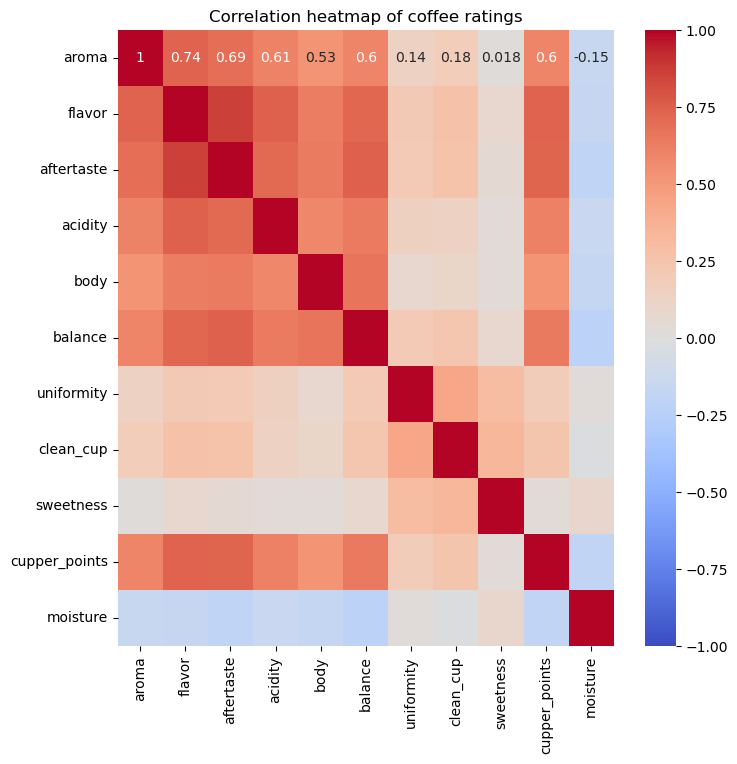

In [1730]:
# correlation matrix:

data = coffee_data[ratings_for_cor]
correlation_matrix = data.corr()

print(correlation_matrix)

plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Correlation heatmap of coffee ratings")
plt.show()

                     aroma    flavor   balance  total_cup_points
aroma             1.000000  0.740314  0.598973          0.685805
flavor            0.740314  1.000000  0.719607          0.826656
balance           0.598973  0.719607  1.000000          0.763011
total_cup_points  0.685805  0.826656  0.763011          1.000000


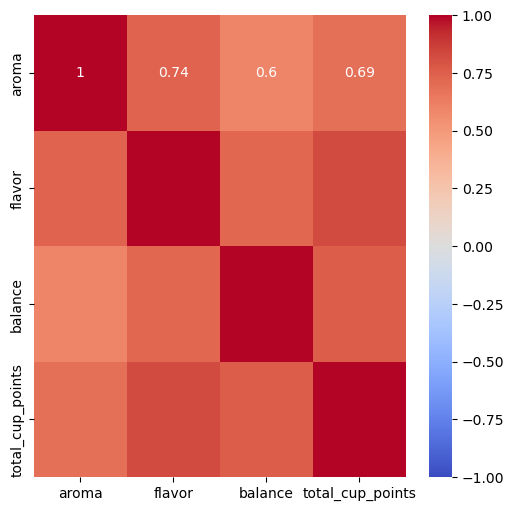

In [75]:
correlation_matrix = coffee_data[["aroma", "flavor", "balance", "total_cup_points"]].corr()
print(correlation_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [1634]:
coffee_data.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In [1500]:
coffee_data.region.unique()

array(['guji-hambela', nan, 'oromia', 'oromiya',
       'snnp/kaffa zone,gimbowereda', 'antioquia', 'kona', 'sulawesi',
       'yirgacheffe', 'yunnan', 'gedio', 'san ramon', 'xalapa', 'sidamo',
       'south of minas', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu'

In [78]:
country_region_company_altitude = coffee_data[["country_of_origin", "region", "company", "altitude_mean_meters"]]

In [80]:
country_region_company_altitude.head(15)

country_of_origin                       region  \
0                 Ethiopia                 guji-hambela   
1                 Ethiopia                 guji-hambela   
2                Guatemala                          NaN   
3                 Ethiopia                       oromia   
4                 Ethiopia                 guji-hambela   
5                   Brazil                          NaN   
6                     Peru                          NaN   
7                 Ethiopia                       oromia   
8                 Ethiopia                      oromiya   
9                 Ethiopia  snnp/kaffa zone,gimbowereda   
10                Ethiopia                       oromia   
11           United States                    antioquia   
12           United States                    antioquia   
13  United States (Hawaii)                         kona   
14                Ethiopia                      oromiya   

                                  company  altitude_mean_meters  
0       metad agricultural developmet plc                2075.0  
1       metad agricultural developmet plc                2075.0  
2                                     NaN                1700.0  
3   yidnekachew debessa coffee plantation                2000.0  
4       metad agricultural developmet plc                2075.0  
5                                     NaN                   NaN  
6   richmond investment-coffee department                   NaN  
7                                     NaN                1635.0  
8                                     NaN                1635.0  
9                  diamond enterprise plc                1822.5  
10                fahem coffee plantation                1905.0  
11               coffee quality institute                1872.0  
12               coffee quality institute                1943.0  
13                                    NaN                 609.6  
14                                    NaN                1635.0

In [81]:
country_region_discrepancies = coffee_data[coffee_data.country_of_origin != coffee_data.region]

In [82]:
country_region_discrepancies[["country_of_origin", "region"]].head(10)

country_of_origin                       region
0          Ethiopia                 guji-hambela
1          Ethiopia                 guji-hambela
2         Guatemala                          NaN
3          Ethiopia                       oromia
4          Ethiopia                 guji-hambela
5            Brazil                          NaN
6              Peru                          NaN
7          Ethiopia                       oromia
8          Ethiopia                      oromiya
9          Ethiopia  snnp/kaffa zone,gimbowereda

In [83]:
coffee_data.loc[coffee_data.region == "oromiya", "region"] = "oromia"

In [84]:
coffee_data.region = coffee_data.region.str.strip()

In [85]:
coffee_data.region.unique()

array(['guji-hambela', nan, 'oromia', 'snnp/kaffa zone,gimbowereda',
       'antioquia', 'kona', 'sulawesi', 'yirgacheffe', 'yunnan', 'gedio',
       'san ramon', 'xalapa', 'sidamo', 'south of minas',
       'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu', 'veracruz

In [86]:
country_company_discrepancies = coffee_data[coffee_data.country_of_origin != coffee_data.company]

In [87]:
country_company_discrepancies[["country_of_origin", "company"]]

country_of_origin                                company
0             Ethiopia      metad agricultural developmet plc
1             Ethiopia      metad agricultural developmet plc
2            Guatemala                                    NaN
3             Ethiopia  yidnekachew debessa coffee plantation
4             Ethiopia      metad agricultural developmet plc
...                ...                                    ...
1334           Ecuador                              robustasa
1335           Ecuador                              robustasa
1336     United States                global opportunity fund
1337             India                          cafe politico
1338           Vietnam                          cafe politico

[1339 rows x 2 columns]

In [91]:
country_region = coffee_data.groupby(["country_of_origin", "region"]).size()

In [92]:
country_region = country_region.reset_index(name = "count_region")

In [93]:
country_region.sort_values(by=["country_of_origin", "count_region"], ascending=False)

country_of_origin                     region  count_region
360            Zambia              mubuyu estate             1
355           Vietnam                       dala             2
356           Vietnam                  don duong             2
357           Vietnam                    vietnam             1
358           Vietnam            vietnam cau dat             1
..                ...                        ...           ...
10             Brazil             matas de minas             1
12             Brazil                        mmm             1
13             Brazil                    mogiana             1
15             Brazil  mountains of minas gerais             1
19             Brazil                       test             1

[361 rows x 3 columns]

In [1648]:
coffee_data.altitude.unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

In [94]:
coffee_data[["altitude", "altitude_low_meters", "altitude_high_meters", "altitude_mean_meters"]].head(20)

altitude  altitude_low_meters  altitude_high_meters  \
0                       1950-2200               1950.0                2200.0   
1                       1950-2200               1950.0                2200.0   
2                   1600 - 1800 m               1600.0                1800.0   
3                       1800-2200               1800.0                2200.0   
4                       1950-2200               1950.0                2200.0   
5                             NaN                  NaN                   NaN   
6                             NaN                  NaN                   NaN   
7                       1570-1700               1570.0                1700.0   
8                       1570-1700               1570.0                1700.0   
9                       1795-1850               1795.0                1850.0   
10                      1855-1955               1855.0                1955.0   
11  meters above sea level: 1.872               1872.0                1872.0   
12  meters above sea level: 1.943               1943.0                1943.0   
13                        2000 ft                609.6                 609.6   
14                      1570-1700               1570.0                1700.0   
15  meters above sea level: 2.080               2080.0                2080.0   
16                     1200-1800m               1200.0                1800.0   
17                            NaN                  NaN                   NaN   
18                           1450               1450.0                1450.0   
19                     1700-2000m               1700.0                2000.0   

    altitude_mean_meters  
0                 2075.0  
1                 2075.0  
2                 1700.0  
3                 2000.0  
4                 2075.0  
5                    NaN  
6                    NaN  
7                 1635.0  
8                 1635.0  
9                 1822.5  
10                1905.0  
11                1872.0  
12                1943.0  
13                 609.6  
14                1635.0  
15                2080.0  
16                1500.0  
17                   NaN  
18                1450.0  
19                1850.0

I will try to clear the altitude:

In [1650]:
len(coffee_data.altitude.unique())

397

In [1840]:
def convert_feet_to_meters(altitude):
    if isinstance(altitude, str):
        # regex to match 'ft', 'feet', 'f', 'ft.'
        match = re.search(r'\b(\d+(\.\d+)?)\s*(f(eet)?|ft\.?)\b', altitude, re.IGNORECASE)
        if match:
            feet_value = float(match.group(1))  
            meters_value = feet_value / 3.281 
            return f"{meters_value:.2f}"
    return altitude

In [1841]:
coffee_data.altitude = coffee_data.altitude.apply(convert_feet_to_meters)

In [1842]:
coffee_data.altitude.unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '609.57',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '426.70', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '1584.88',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1200m', '

In [1843]:
def remove_text(altitude):
    if isinstance(altitude, str):
        cleaned_altitude = re.sub(r"[a-zA-Z~\':+\s公尺(]+", "", altitude)
        return cleaned_altitude if cleaned_altitude else np.nan
    return altitude

In [1844]:
coffee_data.altitude = coffee_data.altitude.apply(remove_text)

In [1845]:
coffee_data.altitude.unique()

array(['1950-2200', '1600-1800', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', '1.872', '1.943', '609.57', '2.080',
       '1200-1800', '1450', '1700-2000', '2.019', '1300', '1320', '2.112',
       '1250', '1950', '1400', '1200', '1750-1800', '1800', '1.941',
       '1.2', '1000', '1754', '900-1500', '1520-2200', '1400-1900',
       '1500-2000', '426.70', '1600', '1800-2000', '5000', '4650', '1700',
       '1500', '13001400..', '1680', '1900', '5600-5760', '1770', '1550',
       '1250-1400', '2.560', '2136', '-1', '1580', '1100', '1584.88',
       '16001950', '800', '1620', '350', '800-1050', '1350', '170',
       '1150', '1750', '2000', '4300', '1700-1850', '1523.93', '4000',
       '16001900', '14501700', '900', '442', '12001350', '900-1200',
       '1889.67', '1432.49', '2560', '3607', '1170', '3664', '1565',
       '3280', '9001100', '1850', '1545-1668', '1530', '.1500...',
       '894-1183', '1500-1700', '968', '1480', '5440-5760', '1260',
       '1650', '890', '

In [1846]:
def remove_dots(altitude):
    if isinstance(altitude, str):
        cleaned_altitude = re.sub(r"\.\.{1,}", "", altitude)
        return cleaned_altitude
    return altitude

In [1847]:
coffee_data.altitude = coffee_data.altitude.apply(remove_dots)

In [1848]:
coffee_data.altitude.unique()

array(['1950-2200', '1600-1800', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', '1.872', '1.943', '609.57', '2.080',
       '1200-1800', '1450', '1700-2000', '2.019', '1300', '1320', '2.112',
       '1250', '1950', '1400', '1200', '1750-1800', '1800', '1.941',
       '1.2', '1000', '1754', '900-1500', '1520-2200', '1400-1900',
       '1500-2000', '426.70', '1600', '1800-2000', '5000', '4650', '1700',
       '1500', '13001400', '1680', '1900', '5600-5760', '1770', '1550',
       '1250-1400', '2.560', '2136', '-1', '1580', '1100', '1584.88',
       '16001950', '800', '1620', '350', '800-1050', '1350', '170',
       '1150', '1750', '2000', '4300', '1700-1850', '1523.93', '4000',
       '16001900', '14501700', '900', '442', '12001350', '900-1200',
       '1889.67', '1432.49', '2560', '3607', '1170', '3664', '1565',
       '3280', '9001100', '1850', '1545-1668', '1530', '.1500',
       '894-1183', '1500-1700', '968', '1480', '5440-5760', '1260',
       '1650', '890', '934',

In [1849]:
def separate_numbers(altitude):
    if isinstance(altitude, str) and len(altitude) >= 6:
        return re.sub(r"(\d{2})(00)(\d{2})", r"\1\2-\3", altitude)
    return altitude

In [1850]:
coffee_data.altitude = coffee_data.altitude.apply(separate_numbers)

In [1757]:
coffee_data.altitude.unique()

array(['1950-2200', '1600-1800', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', '1.872', '1.943', '609.57', '2.080',
       '1200-1800', '1450', '1700-2000', '2.019', '1300', '1320', '2.112',
       '1250', '1950', '1400', '1200', '1750-1800', '1800', '1.941',
       '1.2', '1000', '1754', '900-1500', '1520-2200', '1400-1900',
       '1500-2000', '426.70', '1600', '1800-2000', '5000', '4650', '1700',
       '1500', '1300-1400', '1680', '1900', '5600-5760', '1770', '1550',
       '1250-1400', '2.560', '2136', '-1', '1580', '1100', '1584.88',
       '1600-1950', '800', '1620', '350', '800-1050', '1350', '170',
       '1150', '1750', '2000', '4300', '1700-1850', '1523.93', '4000',
       '1600-1900', '14501700', '900', '442', '1200-1350', '900-1200',
       '1889.67', '1432.49', '2560', '3607', '1170', '3664', '1565',
       '3280', '9001100', '1850', '1545-1668', '1530', '.1500',
       '894-1183', '1500-1700', '968', '1480', '5440-5760', '1260',
       '1650', '890', '9

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

Remove nonsense values in all dataframe:

In [95]:
coffee_data.replace(["test", "TEST"], np.nan, inplace = True)

In [96]:
coffee_data.replace(["mmm", "MMM"], np.nan, inplace = True)

In [97]:
coffee_data.replace(["unknown", "UNKNOWN"], np.nan, inplace = True)

I converted object type columns to category type:

In [101]:
object_columns = coffee_data.select_dtypes(include=["object"]).columns

for col in object_columns:
    coffee_data[col] = coffee_data[col].astype("category")

In [102]:
coffee_data.columns

Index(['species', 'country_of_origin', 'farm_name', 'lot_number', 'mill',
       'ico_number', 'company', 'altitude', 'unit_of_measurement', 'region',
       'producer', 'owner', 'in_country_partner', 'harvest_year',
       'grading_date', 'number_of_bags', 'bag_weight_kg', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'continent'],
      dtype='object')

I arranged the columns:

In [103]:
coffee_data = coffee_data[['species', 'country_of_origin', 'farm_name', 'lot_number',
       'mill','ico_number', 'company', 'altitude', 'unit_of_measurement', 'region', 
       'producer', 'owner', 'in_country_partner', 'harvest_year','grading_date',
       'number_of_bags', 'bag_weight_kg', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup',
       'sweetness', 'cupper_points', 'total_cup_points', 'moisture', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'altitude_low_meters', 
       'altitude_high_meters', 'altitude_mean_meters', 'continent']]

In [104]:
coffee_data

species country_of_origin                                 farm_name  \
0     Arabica          Ethiopia                                 metad plc   
1     Arabica          Ethiopia                                 metad plc   
2     Arabica         Guatemala  san marcos barrancas "san cristobal cuch   
3     Arabica          Ethiopia     yidnekachew dabessa coffee plantation   
4     Arabica          Ethiopia                                 metad plc   
...       ...               ...                                       ...   
1334  Robusta           Ecuador                                 robustasa   
1335  Robusta           Ecuador                                 robustasa   
1336  Robusta     United States                           fazenda cazengo   
1337  Robusta             India                                       NaN   
1338  Robusta           Vietnam                                       NaN   

     lot_number            mill         ico_number  \
0           NaN       metad plc          2014/2015   
1           NaN       metad plc          2014/2015   
2           NaN             NaN                NaN   
3           NaN         wolensu                NaN   
4           NaN       metad plc          2014/2015   
...         ...             ...                ...   
1334   Lavado 1     our own lab                NaN   
1335   Lavado 3  own laboratory                NaN   
1336        NaN    cafe cazengo                NaN   
1337        NaN             NaN  14-1118-2014-0087   
1338        NaN             NaN                NaN   

                                    company       altitude  \
0         metad agricultural developmet plc      1950-2200   
1         metad agricultural developmet plc      1950-2200   
2                                       NaN  1600 - 1800 m   
3     yidnekachew debessa coffee plantation      1800-2200   
4         metad agricultural developmet plc      1950-2200   
...                                     ...            ...   
1334                              robustasa            NaN   
1335                              robustasa             40   
1336                global opportunity fund     795 meters   
1337                          cafe politico            NaN   
1338                          cafe politico            NaN   

     unit_of_measurement                         region  ...       color  \
0                      m                   guji-hambela  ...       Green   
1                      m                   guji-hambela  ...       Green   
2                      m                            NaN  ...         NaN   
3                      m                         oromia  ...       Green   
4                      m                   guji-hambela  ...       Green   
...                  ...                            ...  ...         ...   
1334                   m               san juan, playas  ...  Blue-Green   
1335                   m               san juan, playas  ...  Blue-Green   
1336                   m  kwanza norte province, angola  ...         NaN   
1337                   m                            NaN  ...       Green   
1338                   m                            NaN  ...         NaN   

     category_two_defects expiration                  certification_body  \
0                       0 2016-04-03  METAD Agricultural Development plc   
1                       1 2016-04-03  METAD Agricultural Development plc   
2                       0 2011-05-31        Specialty Coffee Association   
3                       2 2016-03-25  METAD Agricultural Development plc   
4                       2 2016-04-03  METAD Agricultural Development plc   
...                   ...        ...                                 ...   
1334                    1 2017-01-18        Specialty Coffee Association   
1335                    0 2017-01-18        Specialty Coffee Association   
1336                    6 2015-12-23        Specialty Coffee Association   
1337          

In [105]:
coffee_data.dtypes

species                        category
country_of_origin              category
farm_name                      category
lot_number                     category
mill                           category
ico_number                     category
company                        category
altitude                       category
unit_of_measurement            category
region                         category
producer                       category
owner                          category
in_country_partner             category
harvest_year                   category
grading_date             datetime64[ns]
number_of_bags                    int64
bag_weight_kg                     int32
variety                        category
processing_method              category
aroma                           float64
flavor                          float64
aftertaste                      float64
acidity                         float64
body                            float64
balance                         float64
